## Gradient Descent with a Single Feature

///Objective: Use the numerical gradient function from the mini-project to implement a simple linear regression with one feature///

In [10]:
import numpy as np
import matplotlib.pyplot as plt

///Generate Data///

In [16]:
np.random.seed(42)
x=np.linspace(0,10,50)
y=3*x+4+np.random.randn(50)*2

///define function:cost_function (MSE)


In [19]:
def cost_function(params):
    w, b = params
    y_pred = w * x + b
    cost = np.mean((y - y_pred) ** 2)
    return cost

///Define Numerical Gradient function///

In [20]:
def numerical_gradient(cost_func, params, h=1e-5):
    gradients = np.zeros_like(params)

    for i in range(len(params)):
        original_value = params[i]

        # f(x + h)
        params[i] = original_value + h
        f_plus = cost_func(params)

        # f(x - h)
        params[i] = original_value - h
        f_minus = cost_func(params)

        # restore original value
        params[i] = original_value

        # central difference formula
        gradients[i] = (f_plus - f_minus) / (2 * h)

    return gradients

////Linear Regression Training using Numerical Gradient///

In [21]:
def train_linear_regression(X, y, learning_rate=0.01, epochs=1000):
    # Initialize slope (w) and intercept (b)
    params = np.random.randn(2)  # [w, b]
    losses = []

    for epoch in range(epochs):
        # Compute cost
        cost = cost_function(params)
        losses.append(cost)

        # Compute gradients numerically
        grads = numerical_gradient(cost_function, params)

        # Update parameters
        params = params - learning_rate * grads

        # Print progress
        if epoch % 100 == 0:
            print(f"Epoch {epoch:4d} | Loss: {cost:.4f} | w: {params[0]:.3f}, b: {params[1]:.3f}")

    return params, losses

///output://

In [23]:
final_params, losses = train_linear_regression(x, y, learning_rate=0.01, epochs=1000)

# Extract final slope and intercept
w_final, b_final = final_params
print("\n Final Parameters:")
print(f"Slope (w): {w_final:.3f}")
print(f"Intercept (b): {b_final:.3f}")

Epoch    0 | Loss: 655.0405 | w: 2.112, b: 0.152
Epoch  100 | Loss: 4.6521 | w: 3.225, b: 1.850
Epoch  200 | Loss: 3.7926 | w: 3.090, b: 2.754
Epoch  300 | Loss: 3.4797 | w: 3.008, b: 3.299
Epoch  400 | Loss: 3.3658 | w: 2.959, b: 3.628
Epoch  500 | Loss: 3.3243 | w: 2.929, b: 3.827
Epoch  600 | Loss: 3.3092 | w: 2.911, b: 3.947
Epoch  700 | Loss: 3.3037 | w: 2.900, b: 4.019
Epoch  800 | Loss: 3.3017 | w: 2.894, b: 4.063
Epoch  900 | Loss: 3.3010 | w: 2.890, b: 4.089

 Final Parameters:
Slope (w): 2.888
Intercept (b): 4.105


////visualiztion//

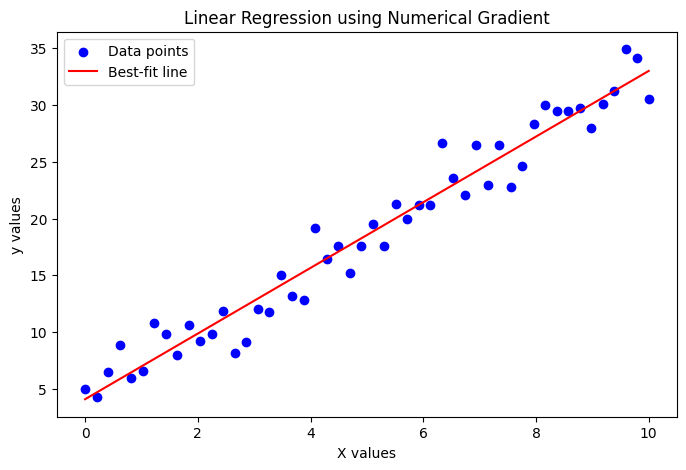

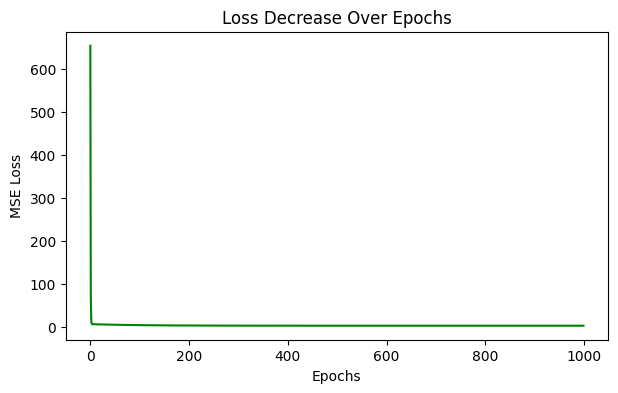

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, w_final * x + b_final, color='red', label='Best-fit line')
plt.title("Linear Regression using Numerical Gradient")
plt.xlabel("X values")
plt.ylabel("y values")
plt.legend()
plt.show()

# Plot loss curve
plt.figure(figsize=(7,4))
plt.plot(losses, color='green')
plt.title("Loss Decrease Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()